In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

C:\Users\SOUBHAGYA\AppData\Local\Temp\ipykernel_18068\2700954711.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import tensorflow as tf
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
df = pd.read_csv('Fir_Details_final_refined.csv')

C:\Users\SOUBHAGYA\AppData\Local\Temp\ipykernel_18068\512808068.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Fir_Details_final_refined.csv')


In [4]:
df

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,Direction,Day_Offence_From,Hour_Offence_From,Minute_Offence_From,Day_Offence_To,Hour_Offence_To,Minute_Offence_To,Day_FIR_Reg,Hour_FIR_Reg,Minute_FIR_Reg
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00,2015-12-27 12:05:00,2016-01-05 11:00:00,05/01/2016,...,WEST,27,12,0,27.0,12.0,5.0,5,11,0
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00,2016-01-12 17:35:00,2016-01-12 19:00:00,12/01/2016,...,WEST,12,17,30,12.0,17.0,35.0,12,19,0
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00,2016-01-12 17:50:00,2016-01-12 19:30:00,12/01/2016,...,EAST,12,17,45,12.0,17.0,50.0,12,19,30
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00,2016-01-14 21:35:00,2016-01-15 14:00:00,15/01/2016,...,WEST,14,21,30,14.0,21.0,35.0,15,14,0
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00,2016-01-18 15:05:00,2016-01-18 19:30:00,18/01/2016,...,NORTH,18,15,0,18.0,15.0,5.0,18,19,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694178,Yadgir,Yadgiri Women PS,0002/2024,1,2024,1,2024-01-10 05:30:00,2024-01-10 21:30:00,2024-01-11 21:30:00,11/01/2024,...,EAST,10,5,30,10.0,21.0,30.0,11,21,30
1694179,Yadgir,Yadgiri Women PS,0003/2024,1,2024,1,2024-01-19 22:30:00,2024-01-19 22:35:00,2024-01-29 19:30:00,29/01/2024,...,WEST,19,22,30,19.0,22.0,35.0,29,19,30
1694180,Yadgir,Yadgiri Women PS,0004/2024,1,2024,2,2024-02-06 15:42:00,2024-02-06 15:45:00,2024-02-07 17:45:00,07/02/2024,...,EAST,6,15,42,6.0,15.0,45.0,7,17,45
1694181,Yadgir,Yadgiri Women PS,0005/2024,1,2024,2,2024-02-19 12:10:00,2024-02-19 12:15:00,2024-02-24 17:00:00,24/02/2024,...,WEST,19,12,10,19.0,12.0,15.0,24,17,0


In [5]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'Conviction Count', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg'],
      dtype='object')

In [6]:
df['FIR Type'] = df['FIR Type'].replace({'Heinous': 1, 'Non Heinous': 0})

C:\Users\SOUBHAGYA\AppData\Local\Temp\ipykernel_18068\3876671163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FIR Type'] = df['FIR Type'].replace({'Heinous': 1, 'Non Heinous': 0})


In [7]:
df['FIR Type'].unique()

array([0, 1], dtype=int64)

In [8]:
df['Conviction Count']

0          0
1          2
2          0
3          0
4          0
          ..
1694178    0
1694179    0
1694180    0
1694181    0
1694182    0
Name: Conviction Count, Length: 1694183, dtype: int64

In [9]:
df['UnitName'].unique().size

1055

In [10]:
import pandas as pd


df['UnitName_encoded'], mapping_index = pd.factorize(df['UnitName'])

mapping_dict = {v: k for v, k in enumerate(mapping_index)}


print(df['UnitName_encoded'].unique().size)

print(mapping_dict)


1055
{0: 'Amengad PS', 1: 'Badami PS', 2: 'Bagalkot CEN Crime PS', 3: 'Bagalkot Rural PS', 4: 'Bagalkot Town PS', 5: 'Bagalkot Traffic PS', 6: 'Bagalkot Women PS', 7: 'Banahatti PS', 8: 'Bilagi PS', 9: 'Guledagudda PS', 10: 'Hungunda PS', 11: 'Ilakal PS', 12: 'Ilakal Rural PS', 13: 'Jamakhandi Rural PS', 14: 'Jamakhandi Town PS', 15: 'Kaladagi PS', 16: 'Kerur PS', 17: 'Lokapur PS', 18: 'Mahalingapur PS', 19: 'Mudhol PS', 20: 'Navanagara PS', 21: 'Savalgi PS', 22: 'Teradal PS', 23: 'APMC Yard PS', 24: 'Ballari CEN Crime PS', 25: 'Ballari Women PS', 26: 'Bellary Rural PS', 27: 'Bellary Traffic PS', 28: 'Brucepet PS', 29: 'Choranuru PS', 30: 'Cowlbazar PS', 31: 'Gadiganur PS', 32: 'Gandhinagar PS', 33: 'Hatcholli PS', 34: 'Kampli  PS', 35: 'Kuduthini PS', 36: 'Kurugod PS', 37: 'Moka PS', 38: 'P.D. Halli PS', 39: 'Sandur PS', 40: 'Sirigeri PS', 41: 'Siruguppa PS', 42: 'Tekkalkota PS', 43: 'Thoranagal PS', 44: 'Bagewadi PS', 45: 'Belagavi City CEN Crime PS', 46: 'Belagavi City Women PS', 47

In [11]:
df['UnitName_encoded']

0             0
1             0
2             0
3             0
4             0
           ... 
1694178    1054
1694179    1054
1694180    1054
1694181    1054
1694182    1054
Name: UnitName_encoded, Length: 1694183, dtype: int64

In [14]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'Conviction Count', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg',
       'UnitName_encoded'],
      dtype='object')

In [17]:
df['Unit_ID'].unique().size

1075

In [20]:
len(df['UnitName'].unique())

1055

In [37]:
test_df = df[['Month','Day_Offence_From','UnitName_encoded','Hour_Offence_From','Accused Count']]
test_df[(test_df['UnitName_encoded'] == 0) & (test_df['Month'] == 1) & (test_df['Day_Offence_From'] == 12) ]

,Month,Day_Offence_From,UnitName_encoded,Hour_Offence_From,Accused Count
1,1,12,0,17,5
2,1,12,0,17,1
424,1,12,0,11,1
426,1,12,0,8,1
1303,1,12,0,11,1
1304,1,12,0,14,2


In [69]:
cri5 = df.groupby(['Year','Month','Day_Offence_From','UnitName_encoded','Hour_Offence_From'], as_index=False).agg({"Accused Count":"sum"})
cri5 = cri5.sort_values(by=['UnitName_encoded'], ascending=False)
cri6 = cri5[(cri5['UnitName_encoded'] == 0) & (cri5['Month'] == 1) & (cri5['Day_Offence_From'] == 12)]
cri6

,Year,Month,Day_Offence_From,UnitName_encoded,Hour_Offence_From,Accused Count
1481840,2024,1,12,0,14,2
1481839,2024,1,12,0,11,1
422165,2018,1,12,0,11,1
422164,2018,1,12,0,8,1
5875,2016,1,12,0,17,6


In [71]:
cri5.shape

(1515458, 6)

In [72]:
cri5.shape

(1515458, 6)

In [73]:
cri5.describe()


,Year,Month,Day_Offence_From,UnitName_encoded,Hour_Offence_From,Accused Count
count,1.515458e+06,1.515458e+06,1.515458e+06,1.515458e+06,1.515458e+06,1.515458e+06
mean,2.019562e+03,6.308973e+00,1.548565e+01,4.908505e+02,1.315128e+01,1.991597e+00
std,2.467892e+00,3.464524e+00,8.898089e+00,3.075541e+02,6.120032e+00,3.700278e+00
min,2.016000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.017000e+03,3.000000e+00,8.000000e+00,2.130000e+02,9.000000e+00,1.000000e+00
50%,2.019000e+03,6.000000e+00,1.500000e+01,4.650000e+02,1.400000e+01,1.000000e+00
75%,2.022000e+03,9.000000e+00,2.300000e+01,7.740000e+02,1.800000e+01,2.000000e+00
max,2.024000e+03,1.200000e+01,3.100000e+01,1.054000e+03,2.300000e+01,1.572000e+03


In [74]:
# Create cri6 from cri5
cri6 = cri5.copy()

# Define 'Alarm' based on 'Accused Count' values
cri6['Alarm'] = cri6['Accused Count'].apply(lambda x: 0 if x < 2 else (1 if x < 10 else 2))
cri6

,Year,Month,Day_Offence_From,UnitName_encoded,Hour_Offence_From,Accused Count,Alarm
1018752,2021,8,14,1054,16,1,0
752222,2019,12,1,1054,11,4,1
1439256,2023,10,29,1054,19,0,0
873424,2020,9,21,1054,11,1,0
782041,2020,2,7,1054,11,1,0
...,...,...,...,...,...,...,...
951143,2021,3,19,0,19,1,0
1392082,2023,8,14,0,21,3,1
1431879,2023,10,17,0,14,1,0
488217,2018,4,18,0,14,1,0


In [77]:
cri6['Alarm'].value_counts()

Alarm
0    999301
1    475352
2     40805
Name: count, dtype: int64

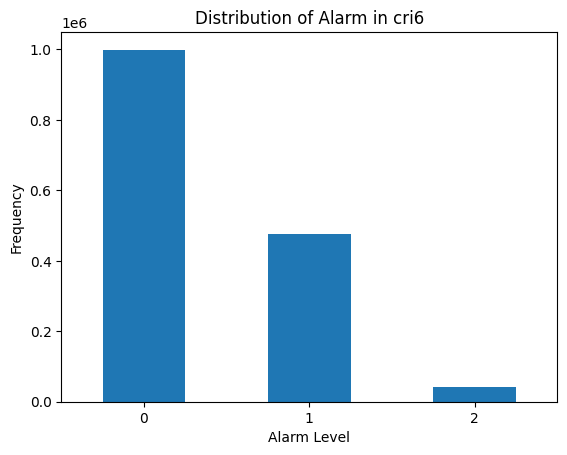

In [78]:
import matplotlib.pyplot as plt

# Plotting the distribution of 'Alarm'
cri6['Alarm'].value_counts().plot(kind='bar')
plt.title('Distribution of Alarm in cri6')
plt.xlabel('Alarm Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [84]:

from sklearn.utils import resample # for upsampling

# Set individual classes
cri6_low = cri6[cri6['Alarm']==0]
cri6_medium = cri6[cri6['Alarm']==1]
cri6_high = cri6[cri6['Alarm']==2]

# Upsample the minority classes to size of class 1 (medium)
cri6_medium_upsampled = resample(cri6_medium, 
                                 replace=True,     # sample with replacement
                                 n_samples=999301,    # to match majority class
                                 random_state=101) 

cri6_high_upsampled = resample(cri6_high, 
                                 replace=True,     # sample with replacement
                                 n_samples=999301,    # to match majority class
                                 random_state=101)

# Combine majority class with upsampled minority class
cri6_upsampled = pd.concat([cri6_low, cri6_medium_upsampled, cri6_high_upsampled])

In [85]:
cri6_upsampled['Alarm'].value_counts()

Alarm
0    999301
1    999301
2    999301
Name: count, dtype: int64

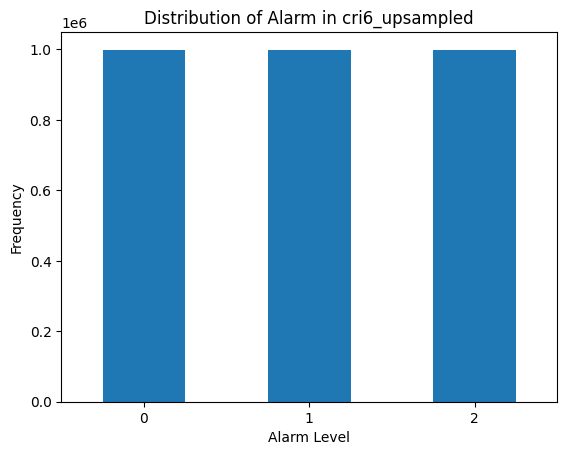

In [86]:
import matplotlib.pyplot as plt

# Plotting the distribution of 'Alarm'
cri6_upsampled['Alarm'].value_counts().plot(kind='bar')
plt.title('Distribution of Alarm in cri6_upsampled')
plt.xlabel('Alarm Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [139]:
X = cri6_upsampled[['Year','Month','Day_Offence_From','UnitName_encoded','Hour_Offence_From']]


In [140]:
X.shape

(2997903, 5)

In [141]:
X.head(10)

,Year,Month,Day_Offence_From,UnitName_encoded,Hour_Offence_From
1018752,2021,8,14,1054,16
1439256,2023,10,29,1054,19
873424,2020,9,21,1054,11
782041,2020,2,7,1054,11
1137928,2022,4,25,1054,1
755132,2019,12,8,1054,8
935696,2021,2,13,1054,23
1044622,2021,10,10,1054,2
1143647,2022,5,6,1054,0
1327485,2023,4,29,1054,15


In [142]:
Y = cri6_upsampled['Alarm']

In [143]:
Y.shape

(2997903,)

In [108]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels



# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101) # 75:25 split

# print(X_train)
# print('hi')
# print(X_test)
# Creating tree
d_tree = DecisionTreeClassifier(random_state=101)
# Fitting tree
d_tree = d_tree.fit(X_train, y_train)
# Predicting !
y_pred = d_tree.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))


Accuracy: 84.69517369468802 


----------Confusion Matrix------------------------------------
Predicted Alarm       0       1       2
Actual Alarm                           
0                167052   75251    7473
1                 29583  218410    2399
2                     0       0  249308

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.67      0.75    249776
           1       0.74      0.87      0.80    250392
           2       0.96      1.00      0.98    249308

    accuracy                           0.85    749476
   macro avg       0.85      0.85      0.84    749476
weighted avg       0.85      0.85      0.84    749476



In [135]:
actual_alarms = cri6[(cri6['Year'] >= 2023) & (cri6['Year'] < 2024) & (cri6['UnitName_encoded'] == 1)]


In [136]:
import pandas as pd

# Creating a date range for every day in 2024
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Creating a DataFrame from this date range
model_features_2024 = pd.DataFrame({
    'Year': date_range.year,
    'Month': date_range.month,
    'Day_Offence_From': date_range.day,
    'UnitName_encoded': 1,  # Setting all to UnitName_encoded 1
    'Hour_Offence_From': 0,  # Assuming a single default hour for simplicity; adjust as needed
})

# Assuming 'Hour_Offence_From' needs to represent all possible hours, you would expand this DataFrame accordingly
# Here is a simple way to assume every hour for each day
model_features_2024 = model_features_2024.loc[model_features_2024.index.repeat(24)].reset_index(drop=True)
model_features_2024['Hour_Offence_From'] = model_features_2024.groupby(['Year', 'Month', 'Day_Offence_From']).cumcount()

model_features_2024.head(50)


,Year,Month,Day_Offence_From,UnitName_encoded,Hour_Offence_From
0,2024,1,1,1,0
1,2024,1,1,1,1
2,2024,1,1,1,2
3,2024,1,1,1,3
4,2024,1,1,1,4
5,2024,1,1,1,5
6,2024,1,1,1,6
7,2024,1,1,1,7
8,2024,1,1,1,8
9,2024,1,1,1,9


In [137]:
# Generate or use existing features for 2024 here
# model_features_2024 = ...

predicted_alarms_2024 = d_tree.predict(model_features_2024)
predicted_alarms_2024_df = pd.DataFrame(predicted_alarms_2024, columns=['Predicted_Alarm'])


C:\Users\SOUBHAGYA\AppData\Local\Temp\ipykernel_18068\2862315887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_alarms['Datetime'] = pd.to_datetime(actual_alarms.assign(day=actual_alarms['Day_Offence_From'], hour=actual_alarms['Hour_Offence_From']).rename(columns={'Year': 'year', 'Month': 'month'})[['year', 'month', 'day', 'hour']])


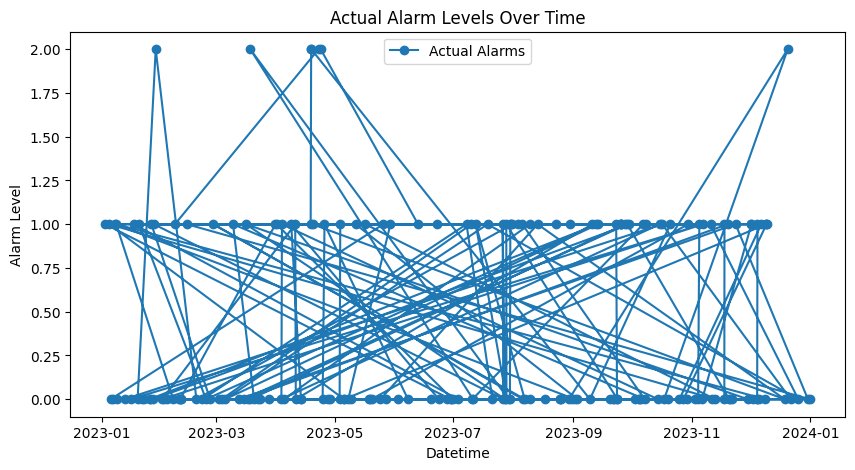

KeyError: 'Day_Offence_From'

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

actual_alarms['Datetime'] = pd.to_datetime(actual_alarms.assign(day=actual_alarms['Day_Offence_From'], hour=actual_alarms['Hour_Offence_From']).rename(columns={'Year': 'year', 'Month': 'month'})[['year', 'month', 'day', 'hour']])
plt.figure(figsize=(10, 5))
plt.plot(actual_alarms['Datetime'], actual_alarms['Alarm'], label='Actual Alarms', marker='o')
plt.title('Actual Alarm Levels Over Time')
plt.xlabel('Datetime')
plt.ylabel('Alarm Level')
plt.legend()
plt.show()


# For predicted alarms in 2024
predicted_alarms_2024_df['Year'] = 2024  # Ensure all entries are for 2024
predicted_alarms_2024_df['Datetime'] = pd.to_datetime(predicted_alarms_2024_df.assign(day=predicted_alarms_2024_df['Day_Offence_From'], hour=predicted_alarms_2024_df['Hour_Offence_From']).rename(columns={'Year': 'year', 'Month': 'month'})[['year', 'month', 'day', 'hour']])
plt.figure(figsize=(10, 5))
plt.plot(predicted_alarms_2024_df['Datetime'], predicted_alarms_2024_df['Predicted_Alarm'], label='Predicted Alarms 2024', marker='o', color='red')
plt.title('Predicted Alarm Levels Over Time (2024)')
plt.xlabel('Time')
plt.ylabel('Alarm Level')
plt.legend()
plt.show()


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming X and Y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)




In [145]:
# Assuming your data is ready and X_train, X_test, y_train, y_test are already defined

# Define the ANN architecture for a classification task
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))  # First hidden layer with 32 neurons
model.add(Dense(64, activation='relu'))  # Additional hidden layer with 16 neurons
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# If it's a multi-class classification, remember to change the last layer to have one neuron per class 
# with softmax activation and loss to 'categorical_crossentropy'


Epoch 1/10
74948/74948 [==============================] - 71s 946us/step - loss: -11259122688.0000 - accuracy: 0.3357 - val_loss: -53689806848.0000 - val_accuracy: 0.3350
Epoch 2/10
32126/74948 [===========>..................] - ETA: 34s - loss: -112179806208.0000 - accuracy: 0.3359

KeyboardInterrupt: 

In [64]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 61.19%


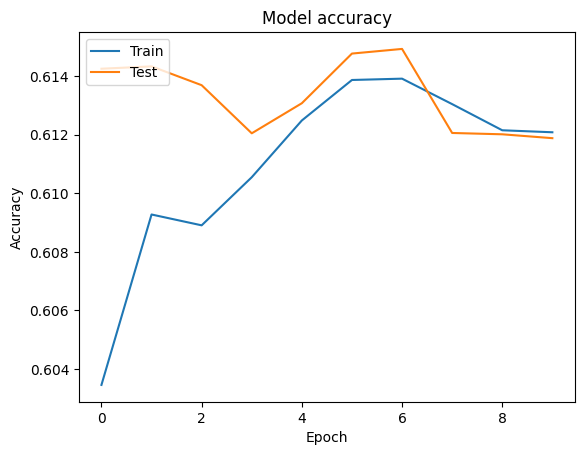

In [65]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


C:\Users\HP1\AppData\Local\Temp\ipykernel_21000\1992784591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['Year', 'Month', 'Day_Offence_From'], inplace=True)
C:\Users\HP1\AppData\Local\Temp\ipykernel_21000\1992784591.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Year'].astype(int)
C:\Users\HP1\AppData\Local\Temp\ipykernel_21000\1992784591.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


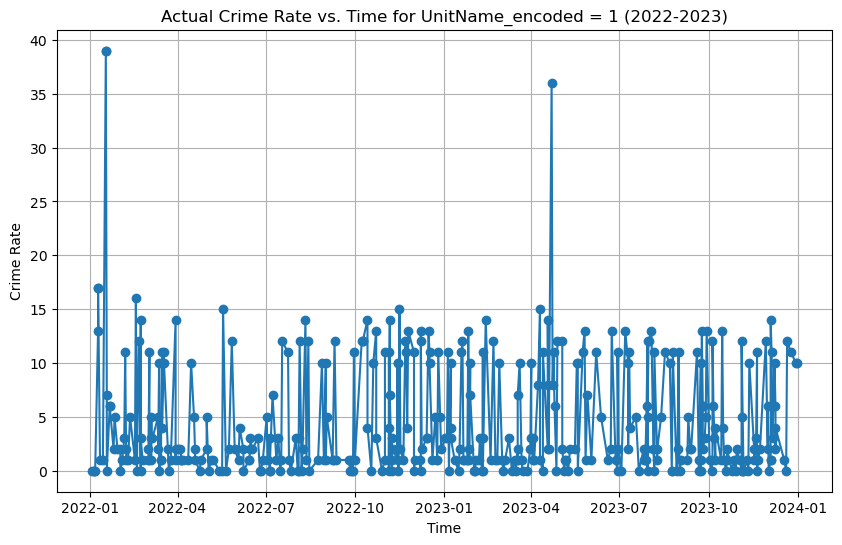

In [21]:
import matplotlib.pyplot as plt

# Filter the DataFrame for UnitName_encoded = 1
df_filtered = df[df['UnitName_encoded'] == 1]

df_filtered.dropna(subset=['Year', 'Month', 'Day_Offence_From'], inplace=True)

# Ensure data types are correct
df_filtered['Year'] = df_filtered['Year'].astype(int)
df_filtered['Month'] = df_filtered['Month'].astype(int)
df_filtered['Day_Offence_From'] = df_filtered['Day_Offence_From'].astype(int)

# Combine and convert to datetime, coercing errors to NaT
df_filtered['DateTime'] = pd.to_datetime(df_filtered['Year'].astype(str) + '-' +
                                         df_filtered['Month'].astype(str) + '-' +
                                         df_filtered['Day_Offence_From'].astype(str), 
                                         format='%Y-%m-%d', errors='coerce')

# Handling NaT values - you can choose to drop them or handle them differently
# Here, dropping rows with NaT values
df_filtered = df_filtered.dropna(subset=['DateTime'])

# Sorting by DateTime to ensure the graph is in chronological order
df_filtered_sorted = df_filtered.sort_values('DateTime')

# Further filter the DataFrame to only include data from 2022 to 2023
df_filtered_2022_2023 = df_filtered[(df_filtered['DateTime'] >= '2022-01-01') &
                                    (df_filtered['DateTime'] <= '2023-12-31')]

# Sorting by DateTime to ensure the graph is in chronological order
df_filtered_2022_2023_sorted = df_filtered_2022_2023.sort_values('DateTime')

# Plotting the graph for 2022-2023
plt.figure(figsize=(10, 6))
plt.plot(df_filtered_2022_2023_sorted['DateTime'], df_filtered_2022_2023_sorted['Crime_Index'], marker='o', linestyle='-')
plt.title('Actual Crime Rate vs. Time for UnitName_encoded = 1 (2022-2023)')
plt.xlabel('Time')
plt.ylabel('Crime Rate')
plt.grid(True)
plt.show()

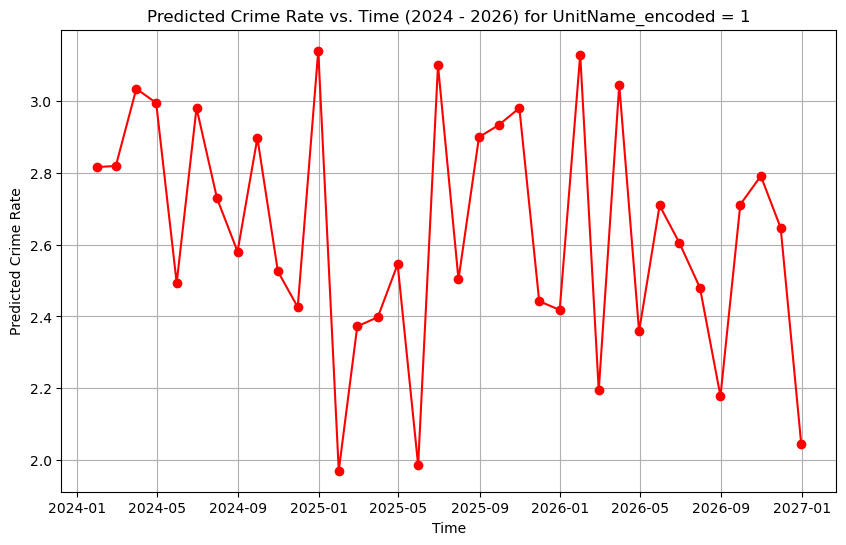

In [20]:
import numpy as np

# Assuming your model is trained and named 'model'
# You need to create a DataFrame for the years 2024 to 2026 for UnitName_encoded = 1
# Here, you should provide appropriate values for the columns based on your dataset characteristics

# Creating a DataFrame for the prediction period (you'll need to adjust the details accordingly)
future_dates = pd.date_range(start='2024-01-01', end='2026-12-31', freq='M')
future_df = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day_Offence_From': np.random.choice(df['Day_Offence_From'].unique(), size=len(future_dates)),
    'Day_Offence_To': np.random.choice(df['Day_Offence_To'].unique(), size=len(future_dates)),
    'Hour_Offence_From': np.random.choice(df['Hour_Offence_From'].unique(), size=len(future_dates)),
    'Hour_Offence_To': np.random.choice(df['Hour_Offence_To'].unique(), size=len(future_dates)),
    'Minute_Offence_From': np.random.choice(df['Minute_Offence_From'].unique(), size=len(future_dates)),
    'Minute_Offence_To': np.random.choice(df['Minute_Offence_To'].unique(), size=len(future_dates)),
    'UnitName_encoded': 1
})

# Predict the Crime Rate for the future dates
future_df['Predicted_Crime_Rate'] = model.predict(future_df)

# Plotting the predicted crime rate
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_df['Predicted_Crime_Rate'], marker='o', linestyle='-', color='r')
plt.title('Predicted Crime Rate vs. Time (2024 - 2026) for UnitName_encoded = 1')
plt.xlabel('Time')
plt.ylabel('Predicted Crime Rate')
plt.grid(True)
plt.show()
